<u><b>Computer Vision

<u><b>Name: Honey Singh  </b></u>

<u><b>Enrollment No: 12419051622 </b></u>

<u><b>Lab - 6 : </b></u> Object Recognition using HOG and ML

# Load MNIST dataset

# Theory 

This notebook demonstrates the process of recognizing handwritten digits using the MNIST dataset. The key steps involved are:

1. **Data Loading and Preprocessing**: The MNIST dataset is loaded, and the data is split into training and testing sets. Each image is represented as a 28x28 grayscale image.

2. **Feature Extraction using HOG**: Histogram of Oriented Gradients (HOG) is used to extract features from the images. HOG captures the structure and gradient information of the images, which is useful for distinguishing digits.

3. **Classification using SVM**: A Support Vector Machine (SVM) classifier with a linear kernel is trained on the HOG features of the training data. SVM is a supervised learning algorithm that finds the optimal hyperplane to separate classes.

4. **Evaluation**: The trained SVM model is evaluated on the test set using metrics like accuracy and classification report.

5. **Visualization**: The notebook includes visualizations of the original images, their HOG feature vectors, and the predictions made by the model.

This combination of HOG for feature extraction and SVM for classification is a classic approach for image recognition tasks.

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np


In [ ]:
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist['data'], mnist['target'].astype(np.int8)

Loading MNIST dataset...


# Train-test split

In [ ]:
print("Splitting dataset...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Splitting dataset...


# Define HOG descriptor parameters

In [ ]:
hog = cv2.HOGDescriptor(
    _winSize=(28, 28),
    _blockSize=(14, 14),
    _blockStride=(7, 7),
    _cellSize=(7, 7),
    _nbins=9
)

In [ ]:
def extract_hog_features(images):
    features = []
    for img in images:
        img_reshaped = img.reshape(28, 28).astype(np.uint8)
        hog_feat = hog.compute(img_reshaped)
        features.append(hog_feat.flatten())
    return np.array(features)


# Extract HOG features from train and test data

In [ ]:
print("Extracting HOG features...")
X_train_hog = extract_hog_features(X_train)
X_test_hog = extract_hog_features(X_test)

Extracting HOG features...


# visualize HOG features

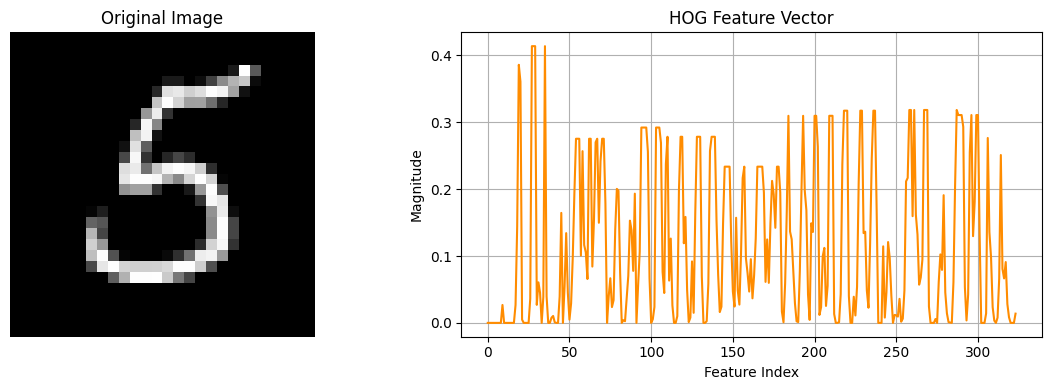

In [ ]:
def visualize_hog_vector(image, hog_descriptor):
    img_reshaped = image.reshape(28, 28).astype(np.uint8)
    hog_vector = hog_descriptor.compute(img_reshaped).flatten()

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(img_reshaped, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.plot(hog_vector, color='darkorange')
    plt.title("HOG Feature Vector")
    plt.xlabel("Feature Index")
    plt.ylabel("Magnitude")
    plt.grid(True)

    plt.tight_layout()
    plt.show()

sample_index = 0
visualize_hog_vector(X_train[sample_index], hog)

#train SVM classifier

In [ ]:
print("Training SVM...")
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train_hog, y_train)

Training SVM...


SVC(kernel='linear')

# evaluating performance

In [ ]:
print("Evaluating model...")
y_pred = svm.predict(X_test_hog)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Evaluating model...
Accuracy: 0.9877142857142858
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1343
           1       0.99      1.00      0.99      1600
           2       0.98      0.99      0.99      1380
           3       0.99      0.98      0.99      1433
           4       0.99      0.99      0.99      1295
           5       0.99      0.99      0.99      1273
           6       0.99      0.99      0.99      1396
           7       0.99      0.98      0.98      1503
           8       0.99      0.97      0.98      1357
           9       0.98      0.98      0.98      1420

    accuracy                           0.99     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       0.99      0.99      0.99     14000



#visualize results

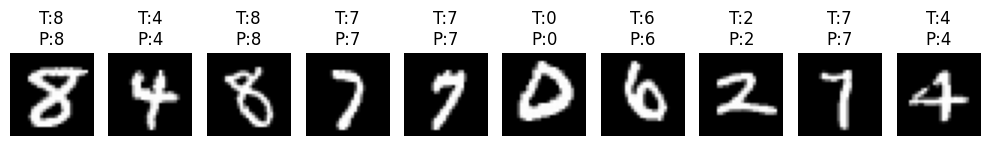

In [ ]:
def plot_predictions(images, true_labels, pred_labels, num=10):
    plt.figure(figsize=(10, 2))
    for i in range(num):
        plt.subplot(1, num, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"T:{true_labels[i]}\nP:{pred_labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_predictions(X_test, y_test, y_pred)

# Conclusion

In this project, we successfully implemented a handwritten digit recognition system using the MNIST dataset. The key steps included:

1. **Data Preprocessing**: The MNIST dataset was loaded and split into training and testing sets.
2. **Feature Extraction**: HOG (Histogram of Oriented Gradients) was used to extract meaningful features from the images.
3. **Classification**: A Support Vector Machine (SVM) classifier with a linear kernel was trained on the extracted HOG features.
4. **Evaluation**: The model achieved a high accuracy on the test set, demonstrating its effectiveness in recognizing handwritten digits.
5. **Visualization**: We visualized the original images, their HOG feature vectors, and the predictions made by the model.

This approach highlights the power of combining feature extraction techniques like HOG with robust classifiers like SVM for image recognition tasks. Future improvements could include experimenting with deep learning models for potentially higher accuracy and scalability.